# emcee hammer sampler logistic example
This example demonstrates how to use the emcee hammer MCMC sampler [1] to sample from the posterior of the logistic model. This sampler evolves multiple 'walkers' in parallel, where the position of the Kth walker is based on the position of the (K-1) walkers in the complementary ensemble.

Here we wrap the implementation of the sampler by the paper author's (see http://dfm.io/emcee/current/) in a Pints module so that it works out of the box with Pints functionality.

[1] "emcee: The MCMC Hammer", Daniel Foreman-Mackey, David W. Hogg, Dustin Lang, Jonathan Goodman, https://arxiv.org/abs/1202.3665.

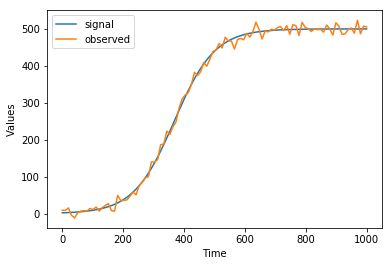

In [14]:
import pints
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = pints.noise.add_independent_noise(signal_values,sigma)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [15]:
# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)
real_parameters = np.array(real_parameters + [sigma])

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, sigma*0.1],
    [0.02, 600, sigma*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_posterior = pints.LogPosterior(prior, log_likelihood)

# Create an adaptive covariance MCMC routine
x0 = real_parameters
mcmc = pints.EmceeHammerMCMC(log_posterior, x0)

# Set number of walkers
mcmc.set_walkers(10)

array([  1.50000000e-02,   5.00000000e+02,   1.00000000e+01])

In [16]:
# Run!
print('Running...')
chain = mcmc.run()
print('Done!')

Running...
Running emcee hammer MCMC
Total number of iterations: 6000
Number of iterations to discard as burn-in: 3000
Storing one sample per 1
Done!


In [17]:
samples = chain.reshape((-1, 3))

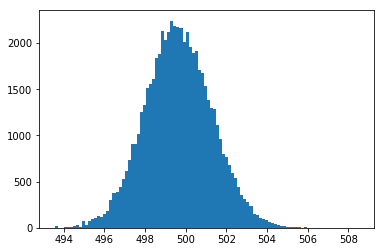

In [20]:
plt.hist(samples[:,1],100)
plt.show()